# Dataset 1: Exploration

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('../data/road_eqr_carpda_cleaned.csv',header=0)
df.head()

,time,country,motor,value
0,2013,Belgium,petroleum,169665
1,2013,Belgium,other,340
2,2013,Belgium,diesel,319863
3,2013,Belgium,electricity,501
4,2013,Belgium,hybrid,5832


# Exploration

## Total number of EVs registered in Europe over time

In [7]:
elec_by_time = df[df.motor=='electricity'][['time','value']].groupby('time').sum()
elec_by_time

,value
time,
2013,29614
2014,50125
2015,79172
2016,97042
2017,158872


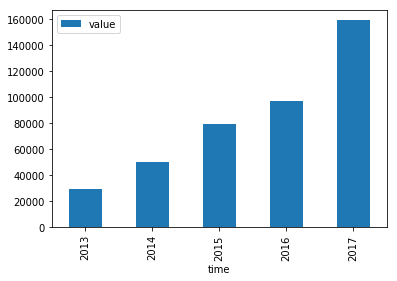

In [8]:
elec_by_time.plot.bar()

## Observations

* The number of registered EVs in Europe is surging
* In 2017, about 4 times as many EVs were registered as 2014!
* **We see an exponential trend!**

In [9]:
print(df.country.unique())

['Belgium' 'Denmark' 'Germany' 'Estonia' 'Ireland' 'Spain' 'France'
 'Croatia' 'Italy' 'Cyprus' 'Latvia' 'Lithuania' 'Hungary' 'Malta'
 'Netherlands' 'Austria' 'Poland' 'Portugal' 'Romania' 'Slovenia'
 'Finland' 'Sweden' 'United Kingdom' 'Liechtenstein' 'Norway'
 'Switzerland' 'North Macedonia' 'Turkey']


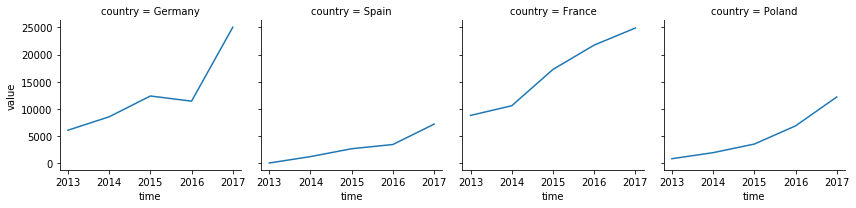

<Figure size 432x288 with 0 Axes>

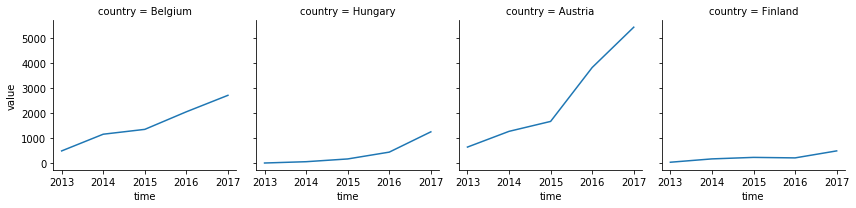

In [10]:
countries = ['Germany', 'France', 'Spain', 'Poland']
df_sel = df[df.country.isin(countries)]
df_sel = df_sel[df_sel.motor=='electricity']
g = sns.FacetGrid(df_sel, col='country')
g.map(sns.lineplot,'time','value')

plt.figure()
countries = ['Hungary', 'Austria', 'Belgium', 'Finland']
df_sel = df[df.country.isin(countries)]
df_sel = df_sel[df_sel.motor=='electricity']
g = sns.FacetGrid(df_sel, col='country')
g.map(sns.lineplot,'time','value')

## Observations

* All major European countries show an ever-increasing market share of EVs
* Germany and France in particular show a fast increase
* Poland, Hungary and Spain are much slower
* Belgium and Austria show tremendous increases despite being relatively small countries

## Highest number of EV registrations per country

In [11]:
max_elec = df[df.motor=='electricity'].loc[:,['country','value']].groupby('country').value.max()
print(max_elec[max_elec==0])
print(max_elec)

country
Denmark            0
Italy              0
North Macedonia    0
Name: value, dtype: int64
country
Austria             5433
Belgium             2717
Croatia               80
Cyprus                44
Denmark                0
Estonia              331
Finland              502
France             24910
Germany            25056
Hungary             1262
Ireland              631
Italy                  0
Latvia               174
Liechtenstein         46
Lithuania            283
Malta                 53
Netherlands         7958
North Macedonia        0
Norway             41583
Poland             12179
Portugal            1912
Romania             3652
Slovenia             297
Spain               7175
Sweden              4359
Switzerland         4900
Turkey               180
United Kingdom     13727
Name: value, dtype: int64


## Market share of electric cars over time 

In [12]:
df_p = pd.read_csv('../data/ev_share_europe.csv')
df_p.head()

,time,country,elec_percent
0,2013,Austria,1.003395
1,2013,Belgium,1.276297
2,2013,Croatia,0.006443
3,2013,Cyprus,1.172058
4,2013,Denmark,0.000000


### Plot: market share over country by time

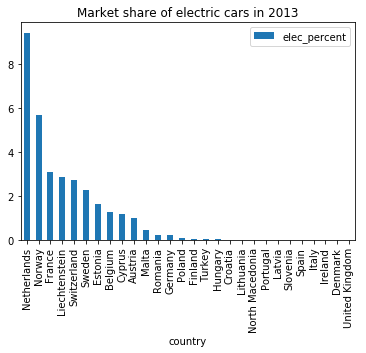

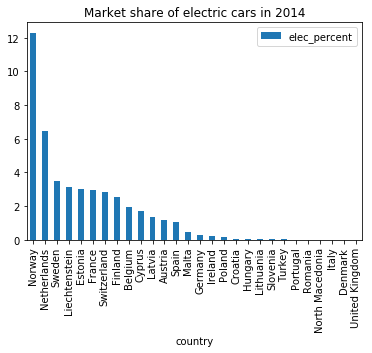

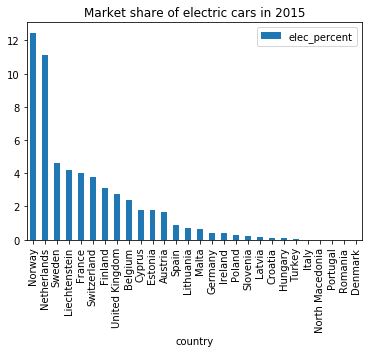

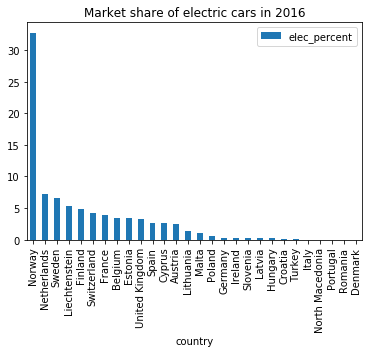

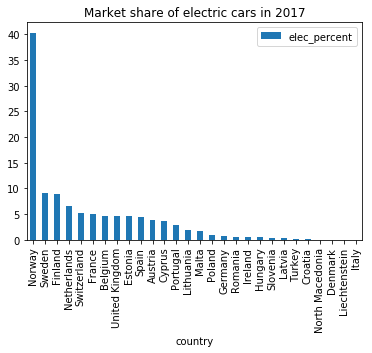

In [13]:
for t in range(2013,2018):
    highest_2017 = df_p[df_p.time==t].drop('time',axis=1).sort_values(by='elec_percent',ascending=False)
    highest_2017.plot.bar(x='country',y='elec_percent')
    plt.title("Market share of electric cars in %s" % t)

## Observations

* In 2013, the Netherlands were leading the way
* But from 2014 onwards, Norway has established itself as the undeniable leader in EV adoption rates!

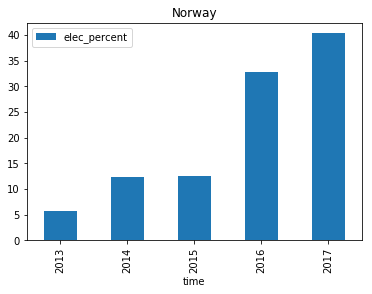

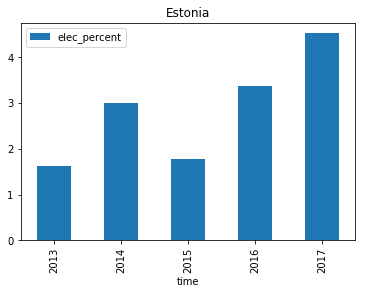

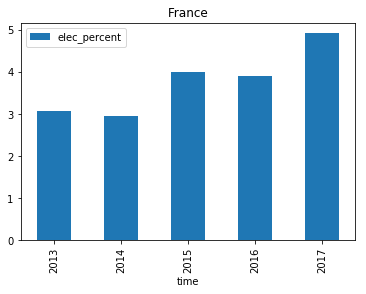

In [14]:
for country in ['Norway','Estonia','France']:
    df_p[df_p.country == country].plot.bar(x='time',y='elec_percent')
    plt.title(country)

## Observations

* Norway shows a very quick increase over time
* Estonia even falls back in one year; this can be explained by an expired government subsidy policy
* France sees a steady increase

0            Austria
1            Belgium
3             Cyprus
5            Estonia
6            Finland
7             France
12            Latvia
13     Liechtenstein
14         Lithuania
15             Malta
16       Netherlands
18            Norway
20          Portugal
23             Spain
24            Sweden
25       Switzerland
27    United Kingdom
Name: country, dtype: object


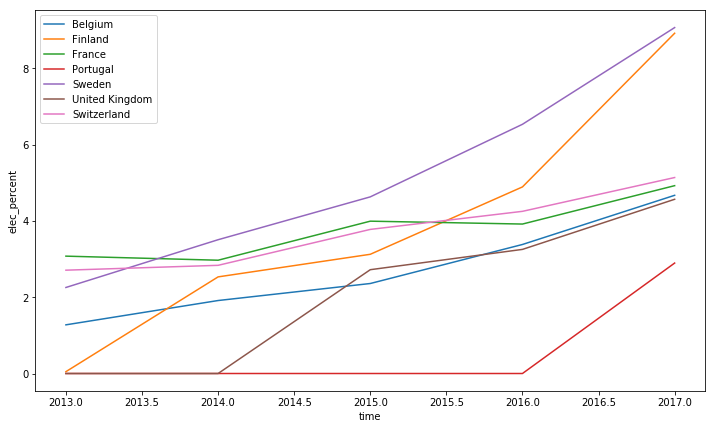

In [15]:
max_p = df_p.groupby('country').elec_percent.max().reset_index()
print(max_p[max_p.elec_percent >= 1].country)

countries = ['Belgium','Finland','France','Portugal','Sweden','United Kingdom','Switzerland']

plt.figure(figsize=(12,7))
for country in countries:
    sns.lineplot(x='time',y='elec_percent',data=df_p[df_p.country==country],label=country)


## Observations

* Large and prosperous European countries all see a steady increase in EV market share